In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [23]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
!curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67119  100 67119    0     0   225k      0 --:--:-- --:--:-- --:--:--  225k


In [27]:
# That line may not work for you; if not, try
import urllib.request

req = urllib.request.Request('https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json')
with urllib.request.urlopen(req) as response:
   data = response.read().decode("utf8")
data[0:300]

'[\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.1,\n    "Beak Depth (mm)": 18.7,\n    "Flipper Length (mm)": 181,\n    "Body Mass (g)": 3750,\n    "Sex": "MALE"\n  },\n  {\n    "Species": "Adelie",\n    "Island": "Torgersen",\n    "Beak Length (mm)": 39.5,\n    "Beak Depth'

In [28]:
data_pd = pd.read_json(data)

In [29]:
# Check that the download was data and not a webpage with an error...
!head penguins.json

[
  {
    "Species": "Adelie",
    "Island": "Torgersen",
    "Beak Length (mm)": 39.1,
    "Beak Depth (mm)": 18.7,
    "Flipper Length (mm)": 181,
    "Body Mass (g)": 3750,
    "Sex": "MALE"
  },


In [30]:
penguins = pd.read_json("penguins.json")

In [9]:
penguins = pd.read_json(data)

In [31]:
g = penguins.iloc[np.random.permutation(len(penguins))]
len(penguins) * .25


86.0

In [32]:
penguins_train = g[87:]
penguins_test  = g[:87]
penguins_train.to_csv( "penguins_train.csv")
penguins_test.to_csv( "penguins_test.csv")
penguins = penguins_train
# There is a mistake in this cell that makes it not do what it 
# was intended.  

In [33]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "penguins_train.csv")
penguins_test = pd.read_csv( "penguins_test.csv")
penguins = penguins_train


In [34]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       115
 Gentoo        95
 Chinstrap     47
 Name: Species, dtype: int64,
 257)

In [35]:
penguins.head()

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,67,Adelie,Biscoe,41.1,19.1,188.0,4100.0,MALE
1,265,Gentoo,Biscoe,43.6,13.9,217.0,4900.0,FEMALE
2,309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE
3,19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
4,305,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,MALE


In [36]:
penguins.describe()

,Unnamed: 0,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g)
count,257.000000,256.000000,256.000000,256.000000,256.000000
mean,171.785992,43.813672,17.148828,201.410156,4224.511719
std,102.613375,5.597276,2.018522,14.104086,806.597949
min,0.000000,32.100000,13.100000,172.000000,2850.000000
25%,80.000000,39.075000,15.475000,190.000000,3550.000000
50%,169.000000,44.450000,17.200000,197.500000,4025.000000
75%,261.000000,48.425000,18.725000,214.000000,4800.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


In [37]:
penguins.Sex.value_counts()

MALE      126
FEMALE    122
.           1
Name: Sex, dtype: int64

In [38]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

Text(0, 0.5, 'Body mass (g)')

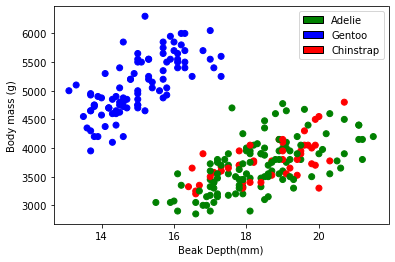

In [39]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)
plt.xlabel("Beak Depth(mm)"); plt.ylabel("Body mass (g)")

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

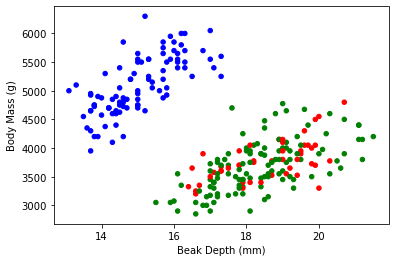

In [40]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [42]:
# ONE-HOT ENCODING

penguins["SP1"] = penguins.Species == "Adelie"
penguins["SP2"] = penguins.Species == "Gentoo"
penguins["SP3"] = penguins.Species == "Chinstrap"
penguins_test["SP1"]= penguins.Species == "Adelie"
penguins_test["SP2"]= penguins.Species == "Gentoo"
penguins_test["SP3"]= penguins.Species == "Chinstrap"


In [43]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(115, 95, 47)

In [45]:
len(penguins)
115+ 95+ 47

257

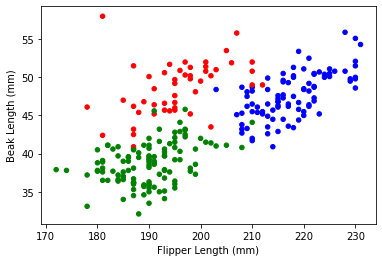

In [102]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [46]:
penguins[["Beak Depth (mm)", "Body Mass (g)"]].values.shape, penguins.SP2.values[:, np.newaxis].shape

((257, 2), (257, 1))

In [104]:
# How do I get this in the right shape?
penguins.SP2.values[:, np.newaxis].shape

(257, 1)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression().fit(penguins[["Beak Depth (mm)", "Body Mass (g)"]].values, penguins.SP2.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [107]:
# Ok, ok, I'll clean up my dataframe.. sorry, scipy..

In [49]:
penguinclean = penguins[np.isfinite( penguins["Beak Depth (mm)"]) & 
                        np.isfinite( penguins["Body Mass (g)"]) &
                        np.isfinite( penguins["Flipper Length (mm)"]) & 
                        np.isfinite( penguins["Beak Length (mm)"])]

In [50]:
penguinclean.isnull().any()

Unnamed: 0             False
Species                False
Island                 False
Beak Length (mm)       False
Beak Depth (mm)        False
Flipper Length (mm)    False
Body Mass (g)          False
Sex                     True
SP1                    False
SP2                    False
SP3                    False
dtype: bool

In [51]:
penguins_train = penguins_train[np.isfinite( penguins_train["Beak Depth (mm)"]) & 
                        np.isfinite( penguins_train["Body Mass (g)"]) &
                        np.isfinite( penguins_train["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_train["Beak Length (mm)"])]

In [52]:
penguins_test = penguins_test[np.isfinite( penguins_test["Beak Depth (mm)"]) & 
                              np.isfinite( penguins_test["Body Mass (g)"]) &
                              np.isfinite( penguins_test["Flipper Length (mm)"]) & 
                              np.isfinite( penguins_test["Beak Length (mm)"])]

In [53]:
penguins_train.isnull().any(), len(penguins_test)

(Unnamed: 0             False
 Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 SP1                    False
 SP2                    False
 SP3                    False
 dtype: bool,
 86)

In [54]:
penguins_test.isnull().any(), len(penguins_test)

(Unnamed: 0             False
 Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 SP1                    False
 SP2                    False
 SP3                    False
 dtype: bool,
 86)

In [55]:
# run linear regression... this with just two columns for X against an 
# indicator variable for species 2
reg = LinearRegression().fit(penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values, penguinclean.SP2.values)

In [56]:
dir(reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [57]:
reg.coef_, reg.intercept_

(array([-0.13131573,  0.00034266]), 1.1754203752278019)

In [58]:
# Let us see if I can build the linear classifier out of the 
# coefficients in reg... 
X = penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values
Y = penguinclean.SP2
YHAT = np.dot(X, reg.coef_ ) + reg.intercept_

In [120]:
# My linear-leastsquares-fit coefficients were 
#  (array([-0.13720996,  0.00033089]), 1.3226593522496826)
# That's b0, b1, and C...
# yhat = b0 * X[:,0] + b1* X[:,1] + C 
# high school algebra... the boundary is x1div = (0.5 - c) / b1 - b0 /b1 * x0

x0div = np.arange(14,24)
x1div = (0.5 - reg.intercept_)/ reg.coef_[1] - reg.coef_[0] / reg.coef_[1] * x0div

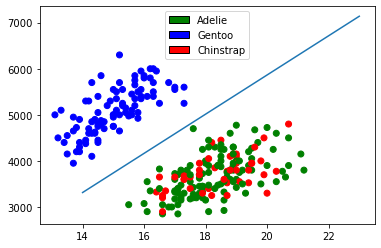

In [121]:
plt.scatter(X[:,0], X[:,1], color=penguinclean.Species.map(colors) )
plt.legend(handles=legend_elements)

plt.plot(x0div, x1div)

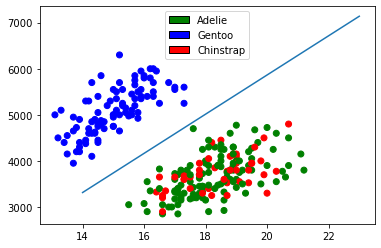

In [122]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.plot(x0div, x1div)

In [ ]:
# "Shooting fish in a barrel."

# We took two features, performed linear regression, and 
# used the coefficients to build a linear classifier.

# Gentoo is easy to tell apart from the other two species of brush-tailed penguin.


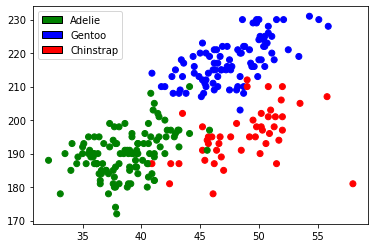

In [123]:
# Other dimensions will be informative about the difference between
# the red and the green birds:
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
# I can glance at this graph and guess at the locations of the
# lines that would separate each of the three species from the
# rest, but I will need a little more theory to do three-way classificaiton. 

In [124]:
# Now I'm going to go after a harder problem; Adelie penguins with all four X
reg4_1 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values, penguins_train.SP1.values)

In [125]:
reg4_1.coef_, reg4_1.intercept_

(array([ 0.09549233,  0.00013648, -0.07127298, -0.00515903]),
 2.400865376145987)

In [ ]:
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])
reg4_1.coef_, reg4_1.intercept_

In [ ]:
# Can I interpret these coefficients?  I can interpret their signs, of course..
# Three of the measurements are in mm, one is in g, and they have different
# relevant scales.


In [126]:
penguins_train.std()

Unnamed: 0              98.047507
Beak Length (mm)         5.501570
Beak Depth (mm)          1.903730
Flipper Length (mm)     14.405061
Body Mass (g)          816.421390
SP1                      0.498941
SP2                      0.480016
SP3                      0.391669
dtype: float64

In [127]:
# Let's set put the standard deviations of each column of X into an array:
feature_std = np.array([1.964146, 826.402823,  5.046194,  13.464290 ])
# If I arranged the columns correctly, this product 
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])

reg4_1.coef_ * feature_std


['Beak Depth (mm)', 'Body Mass (g)', 'Beak Length (mm)', 'Flipper Length (mm)']


array([ 0.18756087,  0.11279097, -0.3596573 , -0.06946265])

In [ ]:
# tells us a little more about which fields had more weight.  
# Flipper length and Body mass aren't as weighted as two 
# beak measurements.

In [20]:
SP1PREDICT_train= np.dot( penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_

NameError: name 'reg4_1' is not defined

In [130]:
penguins_train["SP1PREDICT"] = SP1PREDICT_train > 0.5
penguins_train["SP1LINEAR"] = SP1PREDICT_train 

<ipython-input-130-5ee9b4dfb503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_train["SP1PREDICT"] = SP1PREDICT_train > 0.5
<ipython-input-130-5ee9b4dfb503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_train["SP1LINEAR"] = SP1PREDICT_train


In [131]:
SP1PREDICT_test= np.dot( penguins_test[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_

In [132]:
penguins_test["SP1PREDICT"] = SP1PREDICT_test > 0.5
penguins_test["SP1LINEAR"] = SP1PREDICT_test 

In [134]:
penguins_train.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

SP1PREDICT  SP1  
False       False    137
            True       2
True        False      2
            True     114
Name: SP1PREDICT, dtype: int64

In [135]:
len(penguins_train)

255

In [ ]:
# On the training data, which is cheating,  
# Out of 256 penguins, the four-dimensional linear classifier got 252 right
# and 4 wrong on the "is-it-an-Adelie"

In [136]:
penguins_test.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

SP1PREDICT  SP1  
False       False    27
            True     24
True        False    16
            True     20
Name: SP1PREDICT, dtype: int64

In [137]:
penguins_test.head()

,Unnamed: 0,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3,SP1PREDICT,SP1LINEAR
0,304,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,FEMALE,False,False,True,False,0.073089
1,323,Gentoo,Biscoe,49.1,15.0,228.0,5500.0,MALE,False,True,False,False,-0.091848
2,249,Gentoo,Biscoe,50.0,15.3,220.0,5550.0,MALE,False,True,False,False,-0.079250
3,178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,FEMALE,True,False,False,False,-0.009121
4,72,Adelie,Torgersen,39.6,17.2,196.0,3550.0,FEMALE,False,True,False,True,0.694273


In [21]:
# Since the scores for a binary classifier are in one dimension, 
# I can histogram them

plt.hist(SP1PREDICT_train, bins=50)

NameError: name 'SP1PREDICT_train' is not defined

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 5., 2., 6., 8., 9., 3.,
        3., 2., 3., 6., 0., 1., 0., 0., 0., 1., 0., 1., 1., 6., 2., 2., 0.,
        3., 2., 2., 5., 1., 7., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.58448162, -0.54221696, -0.4999523 , -0.45768764, -0.41542298,
        -0.37315832, -0.33089366, -0.288629  , -0.24636434, -0.20409968,
        -0.16183502, -0.11957035, -0.07730569, -0.03504103,  0.00722363,
         0.04948829,  0.09175295,  0.13401761,  0.17628227,  0.21854693,
         0.26081159,  0.30307625,  0.34534091,  0.38760557,  0.42987023,
         0.47213489,  0.51439955,  0.55666421,  0.59892887,  0.64119353,
         0.68345819,  0.72572285,  0.76798751,  0.81025217,  0.85251683,
         0.89478149,  0.93704615,  0.97931081,  1.02157547,  1.06384013,
         1.10610479,  1.14836945,  1.19063411,  1.23289877,  1.27516343,
         1.31742809,  1.35969275,  1.40195741,  1.44422207,  1.48648673,
         1.52875139]),
 <BarContainer object

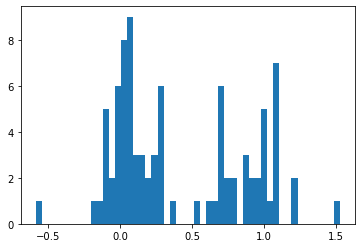

In [140]:
plt.hist(SP1PREDICT_test, bins=50)

(array([ 1.,  1., 22., 20.,  7.,  3., 13., 17.,  2.,  1.]),
 array([-0.58448162, -0.37315832, -0.16183502,  0.04948829,  0.26081159,
         0.47213489,  0.68345819,  0.89478149,  1.10610479,  1.31742809,
         1.52875139]),
 <BarContainer object of 10 artists>)

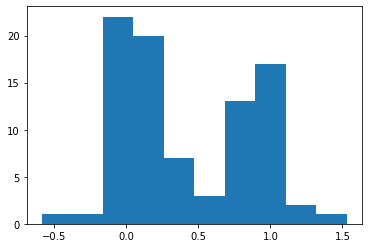

In [141]:
plt.hist(SP1PREDICT_test, bins=10)

In [142]:
# And they are nicely bimodal.
#  SP1PREDICT_train= np.dot( penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg2.coef_) + reg2.intercept_

def penguinspredict(x):
  #  SP1PREDICTION= np.dot( x[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg4_1.coef_) + reg4_1.intercept_
    SP1PREDICTION= np.dot( x,reg4_1.coef_) + reg4_1.intercept_

    return(SP1PREDICTION > 0.5)


In [144]:
# TEST IT (that penguinspredict does something)
penguinspredict(penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values)

array([False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [146]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()


In [147]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1, ygrid[j], xgrid[i]])
       # print(x)
        z[i,j]= penguinspredict(x)


(30, 29) (30, 29) (30, 29)


Text(0, 0.5, 'Flipper Length (mm)')

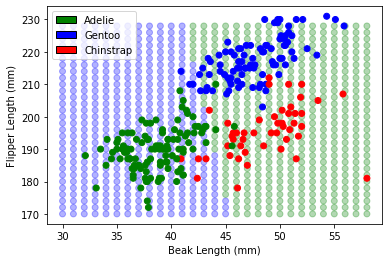

In [148]:
colorsnum = { 0 : "green", 1: "blue", 2: "red"}
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")